# **LABORATORIO 01 - INTELIGENCIA ARTIFICIAL I (SIS420)**
****
Nombre: Jhamil Crespo Rejas

Carrera: Ingenieria en Ciencias de la Computacion
****
## **Regresion Lineal Multivariable**
Inicialmente importamos algunos módulos y establecemos algunas opciones para la visualización del código.


In [3]:
# utilizado para manejos de directorios y rutas
import os #proporciona funciones para interactuar con el sistema operativo, como crear, eliminar o cambiar el nombre de archivos y directorios.

# Computacion vectorial y cientifica para python
import numpy as np #librería que ofrece operaciones matemáticas y científicas con arreglos multidimensionales y matrices.

# Librerias para graficación (trazado de gráficos)
#para crear y personalizar gráficos en 2D y 3D con Python.
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [4]:
#montar tu Google Drive en el entorno de Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


###Carga de Datos
El dataset que se utilizara contiene medidas de diferentes sensores en un sistema de filtración y circulación de pintura. Lo que se buscara predecir es la temperatura que tendra el tanque de pintura en base a esas medidas. Este dataset contiene mas de 110 mil ejemplos.

####Variables de entrada(X):
- FM1: El flujo de ultrafiltración del sistema de pintura
- PE1: Presión de entrada de la ultrafiltración
- PE2: Presión de salida de la ultrafiltración
- PE3: Presión de entrada para la circulación
- PE4: Presión de salida para la circulación
- EPOCH: Tiempo en el que se tomaron las mediciones de las otras variables

####Variables de salida(Y):
- TP1: Temperatura del tanque de pintura




In [5]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/manual_30min_norm(arreglado).csv', delimiter=',')
X = data[:, :6]
y = data[:, 6]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'y'))
print('-'*24)
for i in range(m):
    print('{:8.5f}{:8.5f}{:8.5f}{:8.5f}{:8.5f}{:8.5f}{:10.5f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], y[i]))

Se han truncado las últimas 5000 líneas del flujo de salida.
 0.90906 0.49671 0.58462 0.55168 0.448401569443500.00000   0.37500
 0.90839 0.49663 0.58462 0.55144 0.448081569445200.00000   0.37500
 0.90773 0.49655 0.58462 0.55120 0.447761569447000.00000   0.37500
 0.90707 0.49647 0.58462 0.55096 0.447441569448800.00000   0.37500
 0.90640 0.49639 0.58462 0.55072 0.447121569450600.00000   0.37500
 0.90574 0.49631 0.58462 0.55048 0.446791569452400.00000   0.37500
 0.90508 0.49623 0.58462 0.55024 0.446471569454200.00000   0.37500
 0.90441 0.49615 0.58462 0.55000 0.446151569456000.00000   0.37500
 0.90375 0.49607 0.58462 0.54976 0.445831569457800.00000   0.37500
 0.90308 0.49599 0.58462 0.54952 0.445511569459600.00000   0.37500
 0.90242 0.49591 0.58462 0.54928 0.445191569461400.00000   0.37500
 0.90176 0.49583 0.58462 0.54904 0.444871569463200.00000   0.37500
 0.90109 0.49575 0.58462 0.54880 0.444551569465000.00000   0.37500
 0.90043 0.49567 0.58462 0.54856 0.444231569466800.00000   0.37500
 

###Definicion de Funciones
Primero normalizamos los datos de la matriz a traves de la funcion featureNormalize. Esta funcion devolvera la matriz normalizada (X_norm), el vector de medias de cada caracteristica (mu) y el vector de desviaciones estandar de cada caracteristica (sigma).

In [6]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)#calcula la media de cada columna
    sigma = np.std(X, axis = 0)#calcula la desviacion estandar de cada columna
    X_norm = (X - mu) / sigma #normaliza la matriz X (-1, 1)

    return X_norm, mu, sigma

In [7]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.0000000e+00 5.3846150e-01 5.3846150e-01 1.2307690e-01 1.2307690e-01
  1.3792896e+09]
 [9.9947480e-01 5.3841570e-01 5.3841570e-01 1.2307690e-01 1.2298540e-01
  1.3792914e+09]
 [9.9894960e-01 5.3837000e-01 5.3837000e-01 1.2307690e-01 1.2289380e-01
  1.3792932e+09]
 ...
 [2.3529410e-01 4.9230770e-01 5.5384620e-01 5.2307690e-01 4.0000000e-01
  1.5784380e+09]
 [2.3529410e-01 4.9230770e-01 5.5384620e-01 5.2307690e-01 4.0000000e-01
  1.5784398e+09]
 [2.3529410e-01 4.9230770e-01 5.5384620e-01 5.2307690e-01 4.0000000e-01
  1.5784416e+09]]
Media calculada: [4.68308744e-01 5.61586426e-01 5.85491063e-01 5.24408335e-01
 3.99311280e-01 1.47886560e+09]
Desviación estandar calculada: [2.58922438e-01 5.98709003e-02 4.00753545e-02 1.25888280e-01
 1.25386727e-01 5.74907500e+07]
[[ 2.05347694 -0.3862465  -1.17352831 -3.18799681 -2.20305918 -1.73203515]
 [ 2.05144854 -0.38701148 -1.17467116 -3.18799681 -2.20378892 -1.73200384]
 [ 2.04942013 -0.38777479 -1.17581151 -3.18799681 -2.20451946 -1.73197253]
 

Concatenamos un columna de unos a la matriz normalizada

In [8]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1) #para facilitar el calculo de la hipotesis

In [9]:
print(X)

[[ 1.          2.05347694 -0.3862465  ... -3.18799681 -2.20305918
  -1.73203515]
 [ 1.          2.05144854 -0.38701148 ... -3.18799681 -2.20378892
  -1.73200384]
 [ 1.          2.04942013 -0.38777479 ... -3.18799681 -2.20451946
  -1.73197253]
 ...
 [ 1.         -0.89993994 -1.15713519 ... -0.01057633  0.00549277
   1.73197253]
 [ 1.         -0.89993994 -1.15713519 ... -0.01057633  0.00549277
   1.73200384]
 [ 1.         -0.89993994 -1.15713519 ... -0.01057633  0.00549277
   1.73203515]]


Calculamos el costo de la regresion lineal a traves de la funcion computeCostMulti

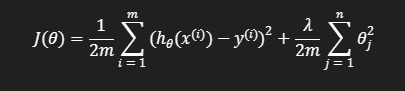

Y el descenso por el gradiente con la funcion gradientDescentMulti que nos ayuda a actualizar theta

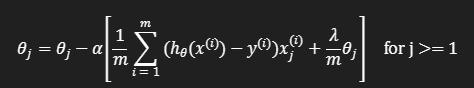

In [10]:
def computeCostMultiRegularizado(X, y, theta, lambda_):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    h = np.dot(X, theta) #calcula la hipotesis

    # Agrega el término de regularización al costo (excepto para theta[0])
    temp = theta
    temp[0] = 0
    J = (1/(2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    return J


In [11]:
def gradientDescentMultiRegularizado(X, y, theta, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = [] #almacena los valores de la funcion de costo de cada iteracion

    for i in range(num_iters):
        h = np.dot(X, theta)
        grad = (1 / m) * (h - y).dot(X)

        # Agrega el término de regularización al gradiente (excepto para theta[0])
        grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

        # Actualiza theta
        theta = theta - alpha * grad

        # Calcula el costo con regularización y lo agrega a la historia del costo
        J = computeCostMultiRegularizado(X, y, theta, lambda_)
        J_history.append(J)

    return theta, J_history


Llamamos a la funcion del descenso por el gradiente y graficamos la convergencia del costo (J). Tambien se realiza un ejemplo de prediccion

theta calculado por el descenso por el gradiente: [ 0.         -0.01004983  0.00655349 -0.00525556 -0.01705908 -0.00539258
  0.00489396]
La temperatura predecida es (usando el descenso por el gradiente): 0.0408049


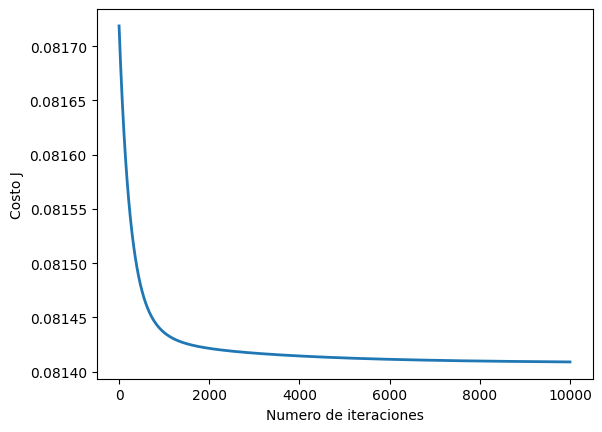

In [12]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003 taza de aprendizaje
num_iters = 10000
lambda_ = 0.1 #Este es el parámetro de regularización. Controla el grado de regularización y ayuda a prevenir el sobreajuste.

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = gradientDescentMultiRegularizado(X, y, theta, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Ejemplo de prediccion
X_array = [1, 0.9994576, 0.5384178, 0.5384987, 0.1230634, 0.1229745, 1379291500.0000000]
X_array[1:7] = (X_array[1:7] - mu) / sigma
temperature = np.dot(X_array, theta)   # Se debe cambiar esto

print('La temperatura predecida es (usando el descenso por el gradiente): {:.7f}'.format(temperature))

In [13]:
import random
for i in range(10):
  x1 = random.uniform(0.9990000, 1)
  x1 = round(x1, 7)
  x2 = random.uniform(0.5380000, 0.5390000)
  x2 = round(x2, 7)
  x3 = random.uniform(0.5380000, 0.5390000)
  x3 = round(x3, 7)
  x4 = random.uniform(0.1230000, 0.1240000)
  x4 = round(x4, 7)
  x5 = random.uniform(0.1230000, 0.1240000)
  x5 = round(x5, 7)
  x6 = random.uniform(1379000000, 1380000000)
  x6 = round(x6, 7)
  X_array = [1, x1, x2, x3, x4, x5, x6]
  X_array[1:7] = (X_array[1:7] - mu) / sigma
  temperature = np.dot(X_array, theta)   # Se debe cambiar esto
  print("Ejemplo {0}: {1}, {2}, {3}, {4}, {5}, {6}".format(i+1, x1, x2, x3, x4, x5, x6))
  print('La temperatura predecida es (usando el descenso por el gradiente): {:.7f}'.format(temperature))

Ejemplo 1: 0.9995213, 0.5389208, 0.5380983, 0.1232485, 0.1235869, 1379593003.3206408
La temperatura predecida es (usando el descenso por el gradiente): 0.0408843
Ejemplo 2: 0.999172, 0.5386703, 0.5389222, 0.1231865, 0.1230994, 1379329370.852902
La temperatura predecida es (usando el descenso por el gradiente): 0.0407693
Ejemplo 3: 0.9994916, 0.5380497, 0.5384473, 0.1232891, 0.1235803, 1379323736.0941923
La temperatura predecida es (usando el descenso por el gradiente): 0.0407162
Ejemplo 4: 0.9991224, 0.5387785, 0.5386258, 0.1231855, 0.1235702, 1379996458.3997855
La temperatura predecida es (usando el descenso por el gradiente): 0.0408586
Ejemplo 5: 0.9999882, 0.5388962, 0.5387751, 0.123691, 0.1233742, 1379318157.7078643
La temperatura predecida es (usando el descenso por el gradiente): 0.0407005
Ejemplo 6: 0.9996463, 0.53806, 0.5386194, 0.1234281, 0.1234493, 1379421443.410814
La temperatura predecida es (usando el descenso por el gradiente): 0.0406838
Ejemplo 7: 0.9993252, 0.5382777, 0

Resultados:

Ejemplo 1: 0.9997602, 0.538551, 0.5382689, 0.1231371, 0.1237169, 1379710853.2093484

La temperatura predecida es (usando el descenso por el gradiente): 0.4373281

Ejemplo 2: 0.999631, 0.5384721, 0.5382463, 0.1239481, 0.1231685, 1379881983.566781

La temperatura predecida es (usando el descenso por el gradiente): 0.4372557

Ejemplo 3: 0.999759, 0.5381126, 0.5388168, 0.1238409, 0.1232193, 1379193570.2771578

La temperatura predecida es (usando el descenso por el gradiente): 0.4370903

Ejemplo 4: 0.9994533, 0.5381296, 0.5384208, 0.1234791, 0.1235087, 1379971885.765815

La temperatura predecida es (usando el descenso por el gradiente): 0.4372588

Ejemplo 5: 0.9991066, 0.5384547, 0.5389619, 0.1237686, 0.1236648, 1379328512.208335

La temperatura predecida es (usando el descenso por el gradiente): 0.4371362

Ejemplo 6: 0.9994412, 0.5385658, 0.538481, 0.1232074, 0.1230689, 1379882246.0978215

La temperatura predecida es (usando el descenso por el gradiente): 0.4373472

Ejemplo 7: 0.9991612, 0.5387531, 0.5388106, 0.1230465, 0.123024, 1379752047.4877164

La temperatura predecida es (usando el descenso por el gradiente): 0.4373480

Ejemplo 8: 0.99944, 0.5383222, 0.5383016, 0.1238643, 0.1232847, 1379942041.2526803

La temperatura predecida es (usando el descenso por el gradiente): 0.4372509

Ejemplo 9: 0.9992397, 0.538029, 0.5389908, 0.1233837, 0.12337, 1379012919.9974592

La temperatura predecida es (usando el descenso por el gradiente): 0.4371186

Ejemplo 10: 0.9991413, 0.5381756, 0.5384222, 0.1230862, 0.1238551, 1379744906.215011

La temperatura predecida es (usando el descenso por el gradiente): 0.4372948

##Ecuacion de la normal
###Carga de datos
Utilizamos el mismo dataset ya descrito al principio y directamente le concatenamos a la matriz X la columna de unos

In [14]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/manual_30min_norm(arreglado).csv', delimiter=',')
X = data[:, :6]
y = data[:, 6]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

###Definimos la funcion de la ecuacion normal regularizada
Le pasamos la matriz de las X's y de las Y's. Esta funcion nos calculara los valores de theta (los parametros)

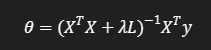

Donde:

L es la matriz de identidad de tamaño n x n con el primer elemento en 0 (para excluir theta[0] de la regularización),



In [15]:
def normalEqnRegularizado(X, y, lambda_):
    # Inicializa algunos valores utiles
    m, n = X.shape

    # Inicializa theta
    theta = np.zeros(n)

    # Agrega el término de regularización a la matriz (excepto para theta[0])
    L = np.eye(n)
    L[0, 0] = 0

    # Calcula theta usando la ecuación normal regularizada
    theta = np.linalg.pinv(X.T.dot(X) + lambda_ * L).dot(X.T).dot(y)

    return theta


Se llama a la funcion de la ecuacion normal y con esos valores de theta ya podemos predecir la temperatura

In [16]:
lambda_ = 0.1 #Este es el parámetro de regularización. Controla el grado de regularización y ayuda a prevenir el sobreajuste.
# Calcula los parametros con la ecuación de la normal
theta = normalEqnRegularizado(X, y, lambda_);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 0.9989496, 0.5383700, 0.5383700, 0.1230769, 0.1228938, 1379293200.0000000]
temperature2 = np.dot(X_array, theta)

print('La temperatura predecida es (ecuacion de la normal): {:.7f}'.format(temperature2))

Theta calculado a partir de la ecuación de la normal: [1.80595508e-19 8.46986552e-20 1.01129053e-19 1.05631976e-19
 9.51516484e-20 7.24899539e-20 2.67480106e-10]
La temperatura predecida es (ecuacion de la normal): 0.3689335


In [17]:
import random
for i in range(10):
  x1 = random.uniform(0.9990000, 1)
  x1 = round(x1, 7)
  x2 = random.uniform(0.5380000, 0.5390000)
  x2 = round(x2, 7)
  x3 = random.uniform(0.5380000, 0.5390000)
  x3 = round(x3, 7)
  x4 = random.uniform(0.1230000, 0.1240000)
  x4 = round(x4, 7)
  x5 = random.uniform(0.1230000, 0.1240000)
  x5 = round(x5, 7)
  x6 = random.uniform(1379000000, 1380000000)
  x6 = round(x6, 7)
  X_array = [1, x1, x2, x3, x4, x5, x6]
  temperature2 = np.dot(X_array, theta)   # Se debe cambiar esto
  print("Ejemplo {0}: {1}, {2}, {3}, {4}, {5}, {6}".format(i+1, x1, x2, x3, x4, x5, x6))
  print('La temperatura predecida es (usando el descenso por el gradiente): {:.7f}'.format(temperature2))

Ejemplo 1: 0.9992932, 0.5387139, 0.5381536, 0.1237566, 0.1233025, 1379124199.6354835
La temperatura predecida es (usando el descenso por el gradiente): 0.3688883
Ejemplo 2: 0.9999944, 0.5389718, 0.5383695, 0.1239106, 0.1237825, 1379796823.9857433
La temperatura predecida es (usando el descenso por el gradiente): 0.3690682
Ejemplo 3: 0.9999294, 0.5382398, 0.5383677, 0.1232902, 0.1237386, 1379186135.0930247
La temperatura predecida es (usando el descenso por el gradiente): 0.3689049
Ejemplo 4: 0.9995074, 0.5382933, 0.5385035, 0.1233686, 0.1231872, 1379085489.067359
La temperatura predecida es (usando el descenso por el gradiente): 0.3688779
Ejemplo 5: 0.9998948, 0.5385723, 0.5388527, 0.1239282, 0.1234514, 1379872862.1779304
La temperatura predecida es (usando el descenso por el gradiente): 0.3690885
Ejemplo 6: 0.9995757, 0.5384581, 0.5387482, 0.1230217, 0.1233945, 1379053676.781939
La temperatura predecida es (usando el descenso por el gradiente): 0.3688694
Ejemplo 7: 0.9992679, 0.538247

Resultados:

Ejemplo 1: 0.9998842, 0.5382769, 0.5387432, 0.1237379, 0.1237578, 1379971649.4329715

La temperatura predecida es (usando el descenso por el gradiente): 0.4375629

Ejemplo 2: 0.9998504, 0.5386602, 0.538001, 0.12396, 0.1232451, 1379986665.3340864

La temperatura predecida es (usando el descenso por el gradiente): 0.4376941

Ejemplo 3: 0.999363, 0.538717, 0.5387905, 0.1233712, 0.1237853, 1379022445.8688488

La temperatura predecida es (usando el descenso por el gradiente): 0.4375810

Ejemplo 4: 0.9996146, 0.5384564, 0.5382917, 0.1235683, 0.1235333, 1379541221.144676

La temperatura predecida es (usando el descenso por el gradiente): 0.4376388

Ejemplo 5: 0.999639, 0.538561, 0.5380366, 0.1235536, 0.1230414, 1379792343.3700633

La temperatura predecida es (usando el descenso por el gradiente): 0.4377310

Ejemplo 6: 0.9995044, 0.5381976, 0.5384875, 0.1235651, 0.1230687, 1379338668.1005378

La temperatura predecida es (usando el descenso por el gradiente): 0.4375759

Ejemplo 7: 0.9991366, 0.5389766, 0.5388268, 0.1230313, 0.1233961, 1379313930.014106

La temperatura predecida es (usando el descenso por el gradiente): 0.4377166

Ejemplo 8: 0.9999424, 0.5384232, 0.5389406, 0.1237154, 0.
1230347, 1379794712.8200333

La temperatura predecida es (usando el descenso por el gradiente): 0.4375604

Ejemplo 9: 0.9995711, 0.5382956, 0.5388182, 0.1230972, 0.1232524, 1379960062.8277817

La temperatura predecida es (usando el descenso por el gradiente): 0.4376803

Ejemplo 10: 0.9999738, 0.5386327, 0.538665, 0.1232089, 0.1230282, 1379842496.0254035

La temperatura predecida es (usando el descenso por el gradiente): 0.4377052

##Regresion Polinomial
###Carga de Datos
Se utiliza el mismo dataset ya mencionado y usado en los anteriores dos ejemplos.

In [18]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt('/content/gdrive/MyDrive/manual_30min_norm(arreglado).csv', delimiter=',')
#print(data)
X = data[:, :6]
y = data[:, 6]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'y'))
print('-'*24)
for i in range(m):
    print('{:8.5f}{:8.5f}{:8.5f}{:8.5f}{:8.5f}{:8.5f}{:10.5f}'.format(X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], y[i]))

Se han truncado las últimas 5000 líneas del flujo de salida.
 0.90906 0.49671 0.58462 0.55168 0.448401569443500.00000   0.37500
 0.90839 0.49663 0.58462 0.55144 0.448081569445200.00000   0.37500
 0.90773 0.49655 0.58462 0.55120 0.447761569447000.00000   0.37500
 0.90707 0.49647 0.58462 0.55096 0.447441569448800.00000   0.37500
 0.90640 0.49639 0.58462 0.55072 0.447121569450600.00000   0.37500
 0.90574 0.49631 0.58462 0.55048 0.446791569452400.00000   0.37500
 0.90508 0.49623 0.58462 0.55024 0.446471569454200.00000   0.37500
 0.90441 0.49615 0.58462 0.55000 0.446151569456000.00000   0.37500
 0.90375 0.49607 0.58462 0.54976 0.445831569457800.00000   0.37500
 0.90308 0.49599 0.58462 0.54952 0.445511569459600.00000   0.37500
 0.90242 0.49591 0.58462 0.54928 0.445191569461400.00000   0.37500
 0.90176 0.49583 0.58462 0.54904 0.444871569463200.00000   0.37500
 0.90109 0.49575 0.58462 0.54880 0.444551569465000.00000   0.37500
 0.90043 0.49567 0.58462 0.54856 0.444231569466800.00000   0.37500
 

Se grafica los puntos de X y de Y

In [19]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Temperatura')
    pyplot.xlabel('Otras mediciones')

In [20]:
print(X)

[[1.0000000e+00 5.3846150e-01 5.3846150e-01 1.2307690e-01 1.2307690e-01
  1.3792896e+09]
 [9.9947480e-01 5.3841570e-01 5.3841570e-01 1.2307690e-01 1.2298540e-01
  1.3792914e+09]
 [9.9894960e-01 5.3837000e-01 5.3837000e-01 1.2307690e-01 1.2289380e-01
  1.3792932e+09]
 ...
 [2.3529410e-01 4.9230770e-01 5.5384620e-01 5.2307690e-01 4.0000000e-01
  1.5784380e+09]
 [2.3529410e-01 4.9230770e-01 5.5384620e-01 5.2307690e-01 4.0000000e-01
  1.5784398e+09]
 [2.3529410e-01 4.9230770e-01 5.5384620e-01 5.2307690e-01 4.0000000e-01
  1.5784416e+09]]


Primero normalizamos los datos de la matriz a traves de la funcion featureNormalize. Esta funcion devolvera la matriz normalizada (X_norm), el vector de medias de cada caracteristica (mu) y el vector de desviaciones estandar de cada caracteristica (sigma). Luego llamamos a la funcion

In [21]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [22]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

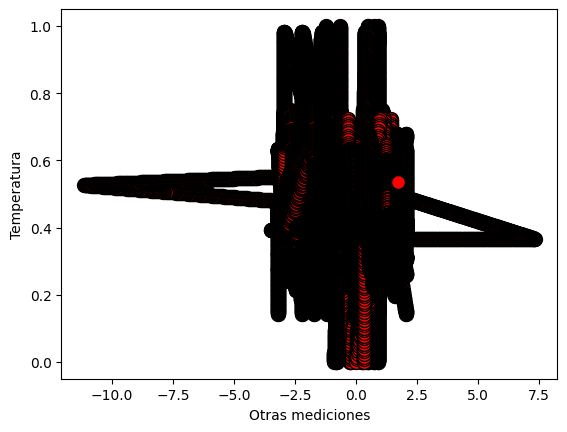

In [23]:
plotData(X_norm, y)

Concatenamos la columna de unos a la Matriz X

In [24]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [25]:
print(X)

[[ 1.          2.05347694 -0.3862465  ... -3.18799681 -2.20305918
  -1.73203515]
 [ 1.          2.05144854 -0.38701148 ... -3.18799681 -2.20378892
  -1.73200384]
 [ 1.          2.04942013 -0.38777479 ... -3.18799681 -2.20451946
  -1.73197253]
 ...
 [ 1.         -0.89993994 -1.15713519 ... -0.01057633  0.00549277
   1.73197253]
 [ 1.         -0.89993994 -1.15713519 ... -0.01057633  0.00549277
   1.73200384]
 [ 1.         -0.89993994 -1.15713519 ... -0.01057633  0.00549277
   1.73203515]]


Calculamos el costo de la regresion lineal a traves de la funcion computeCostMulti

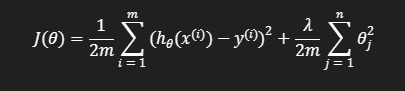

Y el descenso por el gradiente con la funcion gradientDescentMulti que nos ayuda a actualizar theta

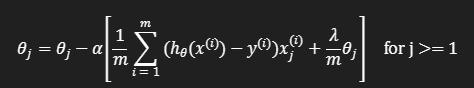

In [26]:
def computeCostMultiRegularizado(X, y, theta, lambda_):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    h = np.dot(X, theta)

    # Agrega el término de regularización al costo (excepto para theta[0])
    temp = theta
    temp[0] = 0
    J = (1/(2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    return J


In [27]:
def gradientDescentMultiRegularizado(X, y, theta, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        grad = (1 / m) * (h - y).dot(X)

        # Agrega el término de regularización al gradiente (excepto para theta[0])
        grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

        # Actualiza theta
        theta = theta - alpha * grad

        # Calcula el costo con regularización y lo agrega a la historia del costo
        J = computeCostMultiRegularizado(X, y, theta, lambda_)
        J_history.append(J)

    return theta, J_history


Llamamos a la funcion del descenso por el gradiente, obtenemos los valores mas optimos de theta y graficamos la convergencia del costo (J). Tambien se realiza un ejemplo de prediccion

theta calculado por el descenso por el gradiente: [ 0.         -0.01000079  0.00783413 -0.00517154 -0.01922915 -0.00396774
  0.00658258]
La temperatura predecida es (polinomial): 0.0411650


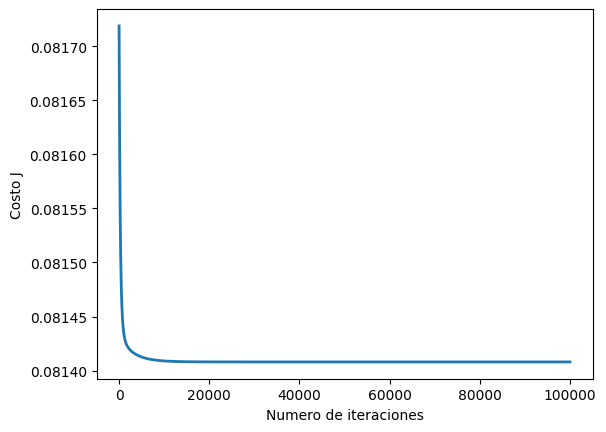

In [28]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000
lambda_ = 0.1

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = gradientDescentMultiRegularizado(X, y, theta, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [1, 0.9994576, 0.5384178, 0.5384987, 0.1230634, 0.1229745, 1379291500.0000000]
X_array[1:7] = (X_array[1:7] - mu) / sigma
Temperature3 = np.dot(X_array, theta)   # Se debe cambiar esto

print('La temperatura predecida es (polinomial): {:.7f}'.format(Temperature3))

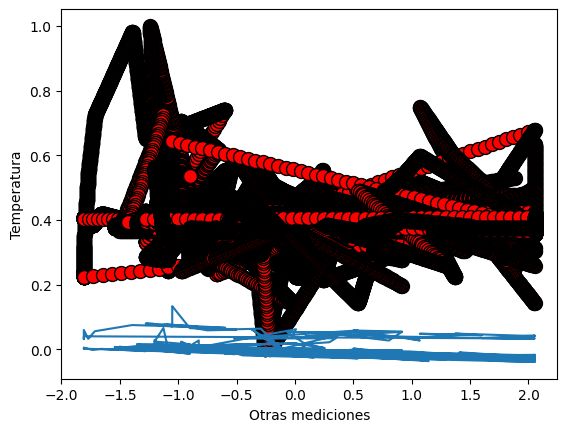

In [29]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [30]:

import random
for i in range(10):
  x1 = random.uniform(0.9990000, 1)
  x1 = round(x1, 7)
  x2 = random.uniform(0.5380000, 0.5390000)
  x2 = round(x2, 7)
  x3 = random.uniform(0.5380000, 0.5390000)
  x3 = round(x3, 7)
  x4 = random.uniform(0.1230000, 0.1240000)
  x4 = round(x4, 7)
  x5 = random.uniform(0.1230000, 0.1240000)
  x5 = round(x5, 7)
  x6 = random.uniform(1379000000, 1380000000)
  x6 = round(x6, 7)
  X_array = [1, x1, x2, x3, x4, x5, x6]
  X_array[1:7] = (X_array[1:7] - mu) / sigma
  temperature = np.dot(X_array, theta)   # Se debe cambiar esto
  print("Ejemplo {0}: {1}, {2}, {3}, {4}, {5}, {6}".format(i+1, x1, x2, x3, x4, x5, x6))
  print('La temperatura predecida es (usando el descenso por el gradiente): {:.7f}'.format(temperature))

Ejemplo 1: 0.9990975, 0.5386563, 0.5385021, 0.123808, 0.1239535, 1379065563.8122604
La temperatura predecida es (usando el descenso por el gradiente): 0.0410391
Ejemplo 2: 0.9993855, 0.5385061, 0.5389555, 0.1234059, 0.1237756, 1379458376.9830163
La temperatura predecida es (usando el descenso por el gradiente): 0.0410618
Ejemplo 3: 0.999923, 0.5388549, 0.5384392, 0.1232172, 0.1233494, 1379767057.5799203
La temperatura predecida es (usando el descenso por el gradiente): 0.0412310
Ejemplo 4: 0.999113, 0.5389518, 0.5382332, 0.1239537, 0.1230792, 1379336425.130248
La temperatura predecida es (usando el descenso por el gradiente): 0.0411482
Ejemplo 5: 0.999386, 0.5387622, 0.5388915, 0.123821, 0.1234867, 1379961476.9501486
La temperatura predecida es (usando el descenso por el gradiente): 0.0411069
Ejemplo 6: 0.9995566, 0.5382883, 0.5387953, 0.1235543, 0.1234581, 1379652092.468545
La temperatura predecida es (usando el descenso por el gradiente): 0.0410569
Ejemplo 7: 0.9994733, 0.5384404, 0.

##Ecuacion de la normal
###Carga de Datos
Cargamos el mismo Dataset dividiendo las X's y las Y's. Ademas, concatenamos la columna de unos a la matriz de las X's.

In [31]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/manual_30min_norm(arreglado).csv', delimiter=',')
X = data[:, :6]
y = data[:, 6]
m = y.size
X_original = X.copy()
#X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print(X.size)

774487


###Definimos la funcion de la ecuacion normal regularizada
Le pasamos la matriz de las X's y de las Y's. Esta funcion nos calculara los valores de theta (los parametros)

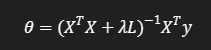

Donde:

L es la matriz de identidad de tamaño n x n con el primer elemento en 0 (para excluir theta[0] de la regularización),



In [32]:
def normalEqnRegularizado(X, y, lambda_):
    # Inicializa algunos valores utiles
    m, n = X.shape

    # Inicializa theta
    theta = np.zeros(n)

    # Agrega el término de regularización a la matriz (excepto para theta[0])
    L = np.eye(n)
    L[0, 0] = 0

    # Calcula theta usando la ecuación normal regularizada
    theta = np.linalg.pinv(X.T.dot(X) + lambda_ * L).dot(X.T).dot(y)

    return theta


LLamamos a la funcion de la ecuacion de la normal para obtener theta y asi poder comenzar a predecir los posibles valores de la temperatura

In [33]:
lambda_ = 0.1 #Este es el parámetro de regularización. Controla el grado de regularización y ayuda a prevenir el sobreajuste.
# Calcula los parametros con la ecuación de la normal
theta = normalEqnRegularizado(X, y, lambda_);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

#X_array = [1, 20, 400]
X_array = [1, 0.9994576, 0.5384179, 0.5384989, 0.1230634, 0.1229745, 1379291500.0000000]
temperature4 = np.dot(X_array, theta)

print('La temperatura predecida es (usando el descenso por el gradiente): {:.7f}'.format(temperature4))

Theta calculado a partir de la ecuación de la normal: [1.80595508e-19 8.46986552e-20 1.01129053e-19 1.05631976e-19
 9.51516484e-20 7.24899539e-20 2.67480106e-10]
La temperatura predecida es (usando el descenso por el gradiente): 0.3689330


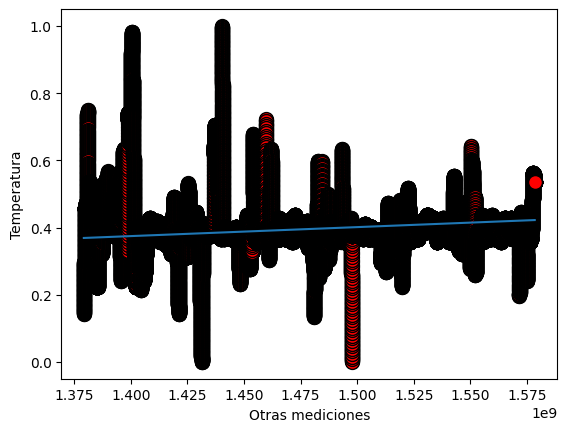

In [34]:
plotData(X[:, 6], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 6], np.dot(X, theta), '-')